### Exploratory Analysis
We will explore the dataset to answer the following research questions:
1. What is the distribution of the target variable?

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1920, 434)

In [2]:
opiates_all = helper.build_test_series(data, 'test','Opiate300', None)
methadone_patients = helper.build_test_series(data, 'test','Opiate300', 'methadone')
buprenorphine_patients = helper.build_test_series(data, 'test','Opiate300', 'buprenorphine')

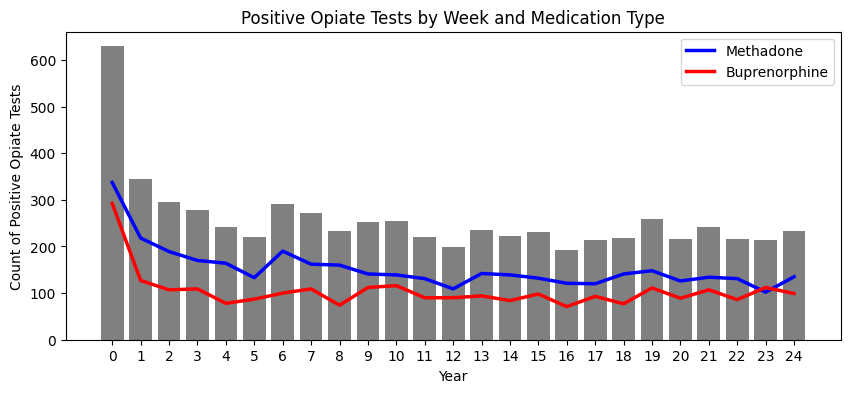

In [10]:
# Create a figure and axis

# set figure size
fig = plt.figure(figsize=(10, 4))

# Convert to numpy array before indexing
sns.barplot(x=np.array(opiates_all.index), y=np.array(opiates_all['tests']), color='gray')

# Similarly, convert to numpy array for the line plot
plt.plot(np.array(methadone_patients.index), np.array(methadone_patients['tests']), color='blue', label='Methadone', linewidth=2.5)

# Similarly, convert to numpy array for the line plot
plt.plot(np.array(buprenorphine_patients.index), np.array(buprenorphine_patients['tests']), color='red', label='Buprenorphine', linewidth=2.5);

# Add labels and title
plt.title('Positive Opiate Tests by Week and Medication Type')
plt.ylabel('Count of Positive Opiate Tests')
plt.xlabel('Year')
plt.legend();